In [1]:
import numpy as np
import pandas as pd

In [2]:
!pip install -q yfinance

In [3]:
import yfinance as yf
%matplotlib inline
import matplotlib.pyplot as plt

In [4]:
sp500 = yf.download("^GSPC", start="2018-01-01", end="2022-01-02", progress=False)
sp500.head()

/tmp/ipython-input-3427775231.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  sp500 = yf.download("^GSPC", start="2018-01-01", end="2022-01-02", progress=False)


Price,Close,High,Low,Open,Volume
Ticker,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC
Date,,,,,
2018-01-02,2695.810059,2695.889893,2682.360107,2683.729980,3397430000
2018-01-03,2713.060059,2714.370117,2697.770020,2697.850098,3544030000
2018-01-04,2723.989990,2729.290039,2719.070068,2719.310059,3697340000
2018-01-05,2743.149902,2743.449951,2727.919922,2731.330078,3239280000
2018-01-08,2747.709961,2748.510010,2737.600098,2742.669922,3246160000


In [5]:
sp500 = sp500['Close']

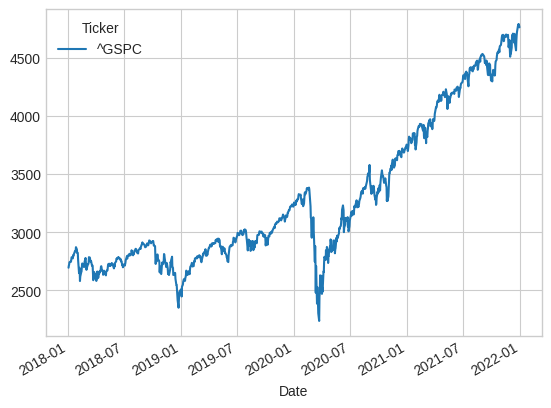

In [6]:
plt.style.use('seaborn-v0_8-whitegrid')
sp500.plot();

/tmp/ipython-input-3853984369.py:4: FutureWarning: 'BA' is deprecated and will be removed in a future version, please use 'BYE' instead.
  sp500.resample("BA").mean().plot(ax=ax, style=":")
/tmp/ipython-input-3853984369.py:5: FutureWarning: 'BA' is deprecated and will be removed in a future version, please use 'BYE' instead.
  sp500.asfreq("BA").plot(ax=ax, style="--")


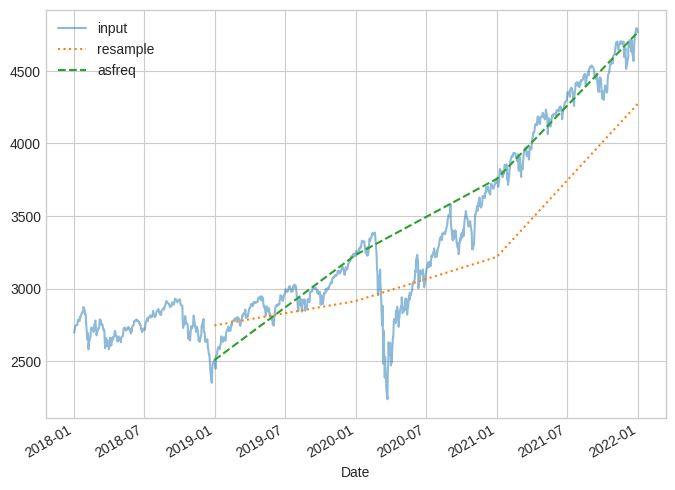

In [8]:
fig, ax = plt.subplots(figsize=(8,6))

sp500.plot(ax=ax, alpha=0.5, style="-")
sp500.resample("BA").mean().plot(ax=ax, style=":")
sp500.asfreq("BA").plot(ax=ax, style="--")
ax.legend(["input", "resample", "asfreq"], loc="upper left")
plt.show();

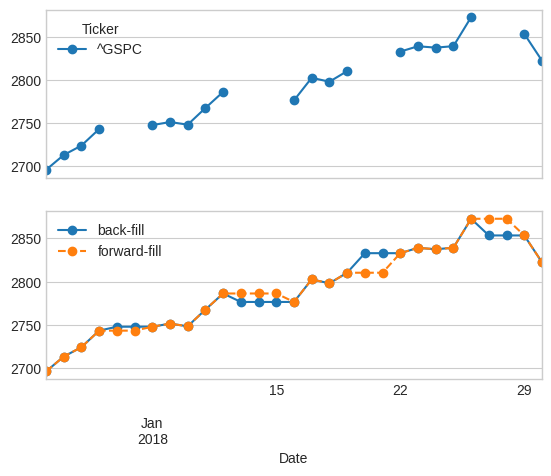

In [9]:
fig , ax = plt.subplots(2, sharex=True)
data = sp500.iloc[:20]

data.asfreq('D').plot(ax=ax[0], marker='o')

data.asfreq('D', method='bfill').plot(ax=ax[1], style='-o')
data.asfreq('D', method='ffill').plot(ax=ax[1], style='--o')
ax[1].legend(["back-fill", "forward-fill"]);

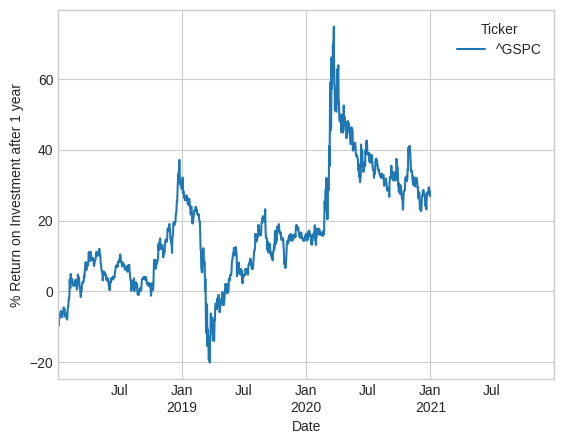

In [10]:
sp500 =sp500.asfreq('D', method='pad')

ROI = 100 * (sp500.shift(-365) -sp500) / sp500
ROI.plot()
plt.ylabel('% Return on Investment after 1 year');

In [11]:
rolling_mean   = sp500.rolling(window=365, center=True).mean()
rolling_median = sp500.rolling(window=365, center=True).median()

In [12]:
data = pd.DataFrame(index=sp500.index)
data["input"] = sp500
data["one-year rolling_mean"] = rolling_mean
data["one-year rolling_median"] = rolling_median

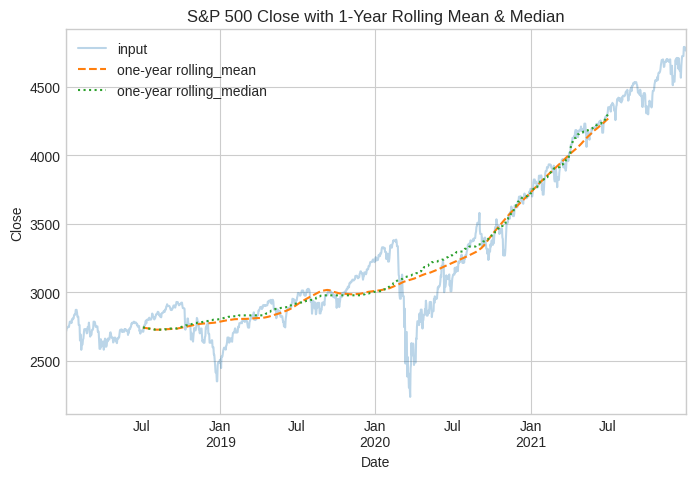

In [13]:
fig, ax = plt.subplots(figsize=(8,5))
data.plot(ax=ax, style={"input": "-",
                        "one-year rolling_mean": "--",
                        "one-year rolling_median": ":"})
ax.lines[0].set_alpha(0.3)
ax.set_ylabel("Close")
ax.set_title("S&P 500 Close with 1-Year Rolling Mean & Median")
ax.legend()
plt.show()